In [116]:
import numpy as np
import random
import matplotlib.pyplot as plt

def Cartones(Num_Cart):

    Lista_Cartones = []
    Rango = np.arange(1, 100)               #Números del cartón de 1 a 99

    for i in range(Num_Cart):               #Genera un número de cartones equivalente al dado
        # Cartón 4x9
        Carton = np.random.choice(Rango, size=(4, 9), replace=False)

        Lista_Cartones.append(Carton)

    return Lista_Cartones                   #Devuelve la lista con los cartones del jugador

def Busca(Jugadores,Num):
    for jugador in Jugadores:                      #Recorre la lista de diccionarios
        for carton in jugador['Cartones']:              #Recorre la lista asociada a los cartones del jugador seleccionado
            for fila in range(len(carton)):          # índice de fila
                for columna in range(len(carton[fila])):   # índice de columna
                    if carton[fila][columna] == Num:
                        carton[fila][columna] = 0         #Cambia el valor del cartón por 0

def Linea(Jugadores, Jug_Linea):
    for jugador in Jugadores:
        for carton in jugador['Cartones']:
            for fila in carton:
                if sum(fila) == 0:          #Si todos los números de una línea suman 0, nos devuelve True en una variable
                    Jug_Linea = jugador
                    return True, Jug_Linea
    return False, None


def Bingo(Jugadores, Jug_Bingo):
    for jugador in Jugadores:
        for carton in jugador['Cartones']:
            if sum(sum(fila) for fila in carton) == 0:       #Si todos los números del cartón suman 0, nos devuelve True en una variable
                Jug_Bingo = jugador
                return True, Jug_Bingo
    return False, None



In [117]:
#Declaración de variables

H_Linea = False
H_Bingo = False

Jug_Linea = None
Jug_Bingo = None

Dinero1 = 1
Dinero2 = 1
Dinero3 = 1
Dinero4 = 1

NCart1 = 1
NCart2 = 1
NCart3 = 1
NCart4 = 1

PrecioCart = 1
PrecioL = 1
PrecioB = 100

Evo1 = []
Evo2 = []
Evo3 = []
Evo4 = []

Cart_1=Cartones(NCart1)
Cart_2=Cartones(NCart2)
Cart_3=Cartones(NCart3)
Cart_4=Cartones(NCart4)

Jugador_1= {'Nombre' : "Miguel", 'Dinero':Dinero1, 'Cartones':Cart_1,  }
Jugador_2= {'Nombre' : "Saul" , 'Dinero':Dinero2, 'Cartones':Cart_2, }
Jugador_3= {'Nombre': "Eduardo", 'Dinero':Dinero3, 'Cartones':Cart_3, }
Jugador_4= {'Nombre': "Ezequiel", 'Dinero':Dinero4, 'Cartones':Cart_4, }

Jugadores = [Jugador_1, Jugador_2, Jugador_3, Jugador_4]

In [118]:
for _ in range(100):
    Jugador_1['Cartones'] = Cartones(NCart1)
    Jugador_2['Cartones'] = Cartones(NCart2)
    Jugador_3['Cartones'] = Cartones(NCart3)
    Jugador_4['Cartones'] = Cartones(NCart4)

    Jugador_1['Dinero'] -= NCart1 * PrecioCart
    Jugador_2['Dinero'] -= NCart2 * PrecioCart
    Jugador_3['Dinero'] -= NCart3 * PrecioCart
    Jugador_4['Dinero'] -= NCart4 * PrecioCart

    bolas = list(range(1, 100))
    random.shuffle(bolas)
    while bolas:
        Num = bolas.pop()
        Busca(Jugadores,Num)

        if (H_Linea == False):
            H_Linea, Jug_Linea = Linea(Jugadores, Jug_Linea)
            
        if (H_Bingo == False):
            H_Bingo, Jug_Bingo = Bingo(Jugadores, Jug_Bingo)
 
    for jugador in range(len(Jugadores)):
        if Jug_Linea != None:
            if (Jug_Linea['Nombre'] == Jugadores[jugador]['Nombre']):
                Jugadores[jugador]['Dinero'] += PrecioL
                H_Linea = False

        if Jug_Bingo != None:
            if (Jug_Bingo['Nombre'] == Jugadores[jugador]['Nombre']):
                Jugadores[jugador]['Dinero'] += PrecioB
                H_Bingo = False
    
    Evo1.append(Jugador_1['Dinero'])
    Evo2.append(Jugador_2['Dinero'])
    Evo3.append(Jugador_3['Dinero'])
    Evo4.append(Jugador_4['Dinero'])

print(Jugadores[0]['Nombre'], Jugadores[0]['Dinero'], sep = '\n')
print(Jugadores[1]['Nombre'], Jugadores[1]['Dinero'], sep = '\n')
print(Jugadores[2]['Nombre'], Jugadores[2]['Dinero'], sep = '\n')
print(Jugadores[3]['Nombre'], Jugadores[3]['Dinero'], sep = '\n')




Miguel
3030
Saul
2028
Eduardo
2219
Ezequiel
2427


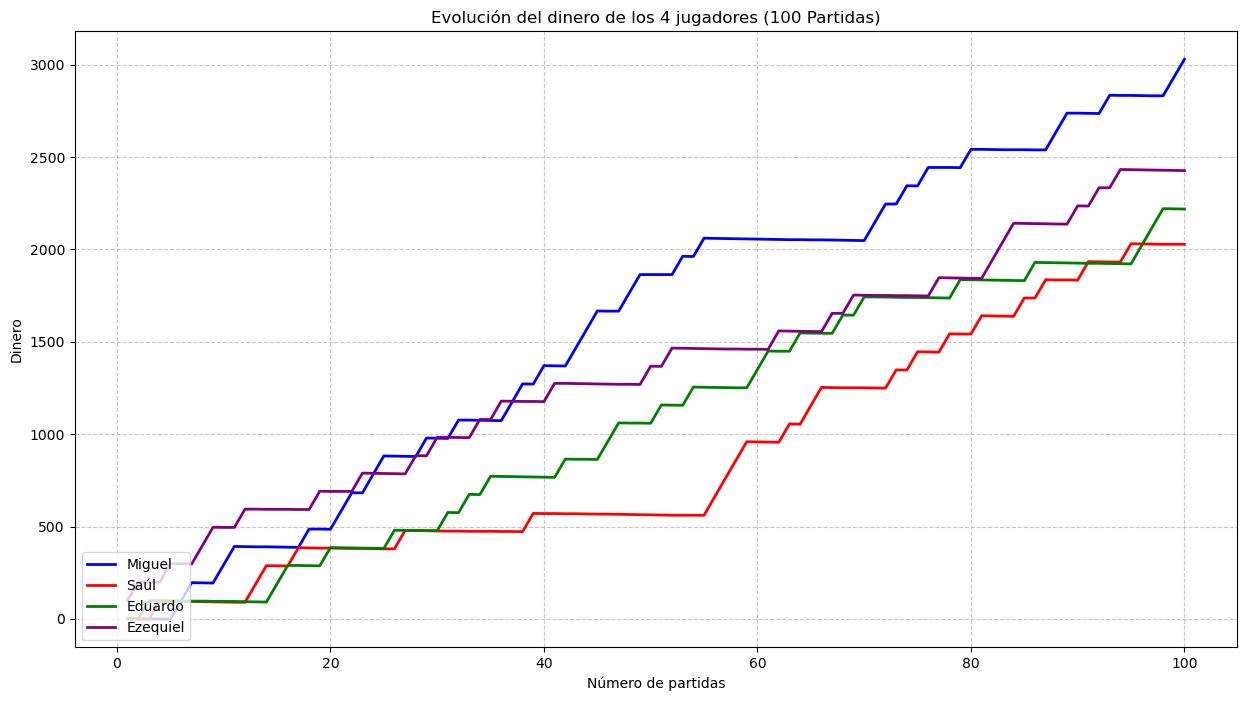

In [119]:

plt.figure(figsize=(15, 8)) # Define el tamaño de la figura

# Definir el eje X de 1 a 100 (partidas)
Eje_X = range(1,101) 

# --- Dibujar las 4 líneas en la misma gráfica ---

# Jugador 1: Miguel
plt.plot(Eje_X, Evo1, label='Miguel', color='blue', linewidth=2) 
# Jugador 2: Saúl
plt.plot(Eje_X, Evo2, label='Saúl', color='red', linewidth=2) 
# Jugador 3: Eduardo
plt.plot(Eje_X, Evo3, label='Eduardo', color='green', linewidth=2) 
# Jugador 4: Ezequiel
plt.plot(Eje_X, Evo4, label='Ezequiel', color='purple', linewidth=2) 


plt.xlabel("Número de partidas")
plt.ylabel("Dinero")
plt.title("Evolución del dinero de los 4 jugadores (100 Partidas)")

plt.legend(loc='lower left') 

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()